In [0]:
import pandas as pd
import numpy as np
import numpy.matlib
from tqdm import tqdm_notebook as tqdm
import os
import glob
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array

Using TensorFlow backend.


#data

##loading data

In [0]:
# !unzip recognizing-faces-in-the-wild.zip
# !unzip train.zip -d train
# !unzip test.zip -d test

In [0]:
train_relationships_df  = pd.read_csv('./train_relationships.csv')
sample_submission_df = pd.read_csv('./sample_submission.csv')

In [0]:
path_train_img = sorted(glob.glob(os.path.join("./train/*/*/", "*.jpg")))
path_test_img = sorted(glob.glob(os.path.join("./test", "*.jpg")))

In [7]:
len(path_train_img), len(path_test_img)

(12379, 6282)

In [8]:
path_train_img[0]

'./train/F0002/MID1/P00009_face3.jpg'

##about data

In [9]:
train_relationships_df.head()

,p1,p2
0,F0002/MID1,F0002/MID3
1,F0002/MID2,F0002/MID3
2,F0005/MID1,F0005/MID2
3,F0005/MID3,F0005/MID2
4,F0009/MID1,F0009/MID4


In [10]:
train_relationships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 2 columns):
p1    3598 non-null object
p2    3598 non-null object
dtypes: object(2)
memory usage: 56.3+ KB


In [11]:
sample_submission_df.head()

,img_pair,is_related
0,face05508.jpg-face01210.jpg,0
1,face05750.jpg-face00898.jpg,0
2,face05820.jpg-face03938.jpg,0
3,face02104.jpg-face01172.jpg,0
4,face02428.jpg-face05611.jpg,0


##mid combinations

In [12]:
sorted(os.listdir(path='./train'))[:3]

['F0002', 'F0005', 'F0009']

In [13]:
os.path.join('./train' ,sorted(os.listdir(path='./train'))[0])

'./train/F0002'

In [14]:
all_mid_path = []
for family in tqdm(sorted(os.listdir(path='./train'))):
  family_path = os.path.join('./train' ,family)
  for mid in sorted(os.listdir(path=family_path)):
    mid_path = os.path.join(family_path, mid)
    all_mid_path.append(mid_path.split('/', 2)[-1])

In [15]:
len(all_mid_path)

2318

In [16]:
all_mid_path[0]

'F0002/MID1'

In [0]:
p1 = np.repeat(all_mid_path, len(all_mid_path))

In [0]:
p2 = np.matlib.repmat(all_mid_path,1,len(all_mid_path))
p2 = p2.reshape((len(p2[0]), 1))

In [0]:
mid_combinations = pd.DataFrame()
mid_combinations['p1'] = p1
mid_combinations['p2'] = p2

In [20]:
mid_combinations.shape

(5373124, 2)

In [0]:
mid_combinations = mid_combinations.reset_index()

In [22]:
mid_combinations.head()

,index,p1,p2
0,0,F0002/MID1,F0002/MID1
1,1,F0002/MID1,F0002/MID2
2,2,F0002/MID1,F0002/MID3
3,3,F0002/MID1,F0005/MID1
4,4,F0002/MID1,F0005/MID2


In [0]:
relation = pd.merge(mid_combinations, train_relationships_df, how='outer', on='p1')

In [0]:
relation = relation[relation.p2_x == relation.p2_y]

In [25]:
relation.shape

(3367, 4)

In [26]:
relation.head()

,index,p1,p2_x,p2_y
2,2.0,F0002/MID1,F0002/MID3,F0002/MID3
2320,2320.0,F0002/MID2,F0002/MID3,F0002/MID3
6958,6958.0,F0005/MID1,F0005/MID2,F0005/MID2
11594,11594.0,F0005/MID3,F0005/MID2,F0005/MID2
13938,13915.0,F0009/MID1,F0009/MID2,F0009/MID2


In [0]:
relation_index = list(relation['index'])

In [28]:
len(relation_index)

3367

In [0]:
mid_combinations['relationship'] = 0
mid_combinations.loc[mid_combinations['index'].isin(relation_index), 'relationship'] = 1

In [30]:
mid_combinations['relationship'].value_counts()

0    5369757
1       3367
Name: relationship, dtype: int64

In [31]:
mid_combinations.head()

,index,p1,p2,relationship
0,0,F0002/MID1,F0002/MID1,0
1,1,F0002/MID1,F0002/MID2,0
2,2,F0002/MID1,F0002/MID3,1
3,3,F0002/MID1,F0005/MID1,0
4,4,F0002/MID1,F0005/MID2,0


In [32]:
mid_combinations.shape

(5373124, 4)

In [0]:
relationiship = mid_combinations.relationship

##image

In [34]:
sorted(os.listdir('./train/F0002/MID1/'))[0]

'P00009_face3.jpg'

In [35]:
all_first_img = []
all_img_path = []
for family in tqdm(sorted(os.listdir(path='./train'))):
  family_path = os.path.join('./train' ,family)
  for mid in sorted(os.listdir(path=family_path)):
    mid_path = os.path.join(family_path, mid)
    img = sorted(os.listdir(mid_path))
    if len(img) != 0:
      img1 = img[0]
      all_first_img.append(img_to_array(load_img(os.path.join(mid_path, img1), target_size=(224, 224))))
      all_img_path.append(os.path.join(mid_path, img1))
    else:
      all_first_img.append(np.zeros((224, 224, 3)))
      all_img_path.append(0)

In [0]:
all_first_img = np.array(all_first_img)

In [0]:
all_first_img = all_first_img.reshape((len(all_first_img), 224*224*3))

In [0]:
all_first_img = list(all_first_img)

In [0]:
p1 = np.repeat(all_first_img, len(all_first_img))
# p2 = np.matlib.repmat(all_first_img,1,len(all_first_img))
# p2 = p2.reshape((len(p2[0]), 1))

# p1_path = np.repeat(all_img_path, len(all_img_path))
# p2_path = np.matlib.repmat(all_img_path,1,len(all_img_path))
# p2_path = p2_path.reshape((len(p2_path[0]), 1))

In [0]:
first_img_combinations = pd.DataFrame()
first_img_combinations['p1'] = p1
first_img_combinations['p2'] = p2
first_img_combinations['relationship'] = relationiship
first_img_combinations = first_img_combinations.reset_index()

In [0]:
first_img_path_combinations = pd.DataFrame()
first_img_path_combinations['p1'] = p1_path
first_img_path_combinations['p2'] = p2_path
first_img_path_combinations['relationship'] = relationiship
first_img_path_combinations = first_img_path_combinations.reset_index()

##train data

In [0]:
first_img_path_combinations = first_img_path_combinations[first_img_path_combinations.p1 != first_img_path_combinations.p2]

In [0]:
first_img_path_combinations = first_img_path_combinations[(first_img_path_combinations.p1!=0) & (first_img_path_combinations.p2!=0)]

In [0]:
index_list = first_img_path_combinations['index']

In [42]:
train_combinations = []
for i in tqdm(index_list):
  train_combinations.append(p1[i])

In [0]:
first_img_combinations = first_img_combinations[first_img_combinations['index'].isin(index_list)]

In [66]:
first_img_combinations.relationship.value_counts()

0    5367437
1       3367
Name: relationship, dtype: int64

In [0]:
X_train_p1 = first_img_combinations.p1.values
X_train_p2 = first_img_combinations.p2.values
Y_train = first_img_combinations.relationship.values

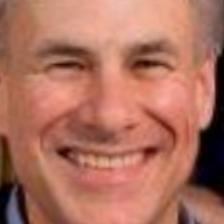

In [104]:
array_to_img(X_train_p1[0])

##test data

In [45]:
sample_submission_df.head(3)

,img_pair,is_related
0,face05508.jpg-face01210.jpg,0
1,face05750.jpg-face00898.jpg,0
2,face05820.jpg-face03938.jpg,0


In [0]:
p1 = []
p2 = []
for i in range(len(sample_submission_df)):
  p1.append(sample_submission_df.img_pair[i].split('-')[0])
  p2.append(sample_submission_df.img_pair[i].split('-')[1])

In [0]:
test_df = pd.DataFrame()
test_df['p1'] = p1
test_df['p2'] = p2

In [50]:
for i in tqdm(range(len(test_df))):
  test_df.p1[i] = img_to_array(load_img(os.path.join('./test', test_df.p1[i]), target_size=(224, 224)))
  test_df.p2[i] = img_to_array(load_img(os.path.join('./test', test_df.p2[i]), target_size=(224, 224)))

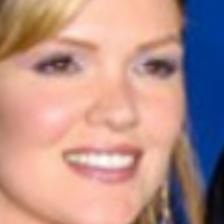

In [48]:
array_to_img(test_df.p1[0])

In [0]:
X_test_p1 = np.array(list(test_df.p1))
X_test_p2 = np.array(list(test_df.p2))

#about model

In [0]:
from keras.callbacks import EarlyStopping
from keras import layers
from keras import Input
from keras.models import Model
import keras
from keras.optimizers import RMSprop

##conv base

In [0]:
from keras.applications import VGG16

In [52]:
conv_base = VGG16(
    weights='imagenet', 
    include_top=False, 
    input_shape=(32, 32, 3)
)

W0614 13:46:46.018816 139764354971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 13:46:46.066126 139764354971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 13:46:46.075165 139764354971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 13:46:46.128830 139764354971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 13:46:46.724771 139764354971520 deprecation_wrapp

In [53]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [0]:
for layer in conv_base.layers[:11]:
    layer.trainable=False

##create model

In [0]:
p1_input = Input((224, 224, 3))
p2_input = Input((224, 224, 3))

In [0]:
p1_features = conv_base(p1_input)
p2_features = conv_base(p2_input)

In [0]:
merged_features = layers.concatenate([p1_features, p2_features], axis=-1)

In [0]:
hidden = layers.Dense(256, activation='relu')(merged_features)

In [0]:
output = layers.Dense(1, activation='sigmoid')(hidden)

In [0]:
model = Model([
        p1_input,
        p2_input
    ],  output
    )

In [61]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
vgg16 (Model)                   multiple             14714688    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 7, 7, 1024)   0           vgg16[1][0]                      
          

##learn

In [62]:
model.compile(optimizer=RMSprop(lr=1e-4), loss="binary_crossentropy", metrics=["acc"])

W0614 13:46:57.558274 139764354971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 13:46:57.572184 139764354971520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [68]:
history = model.fit(
  [
      X_train_p1,
      X_train_p2
  ],
    Y_train,
    epochs = 30,
    batch_size= 128,
#     validation_split=0.15,
#     callbacks = callbacks_list
)

ValueError: ignored

In [0]:
np.reshape(X_train_p1, (len(X_train_p1), 224, 224, 3))

In [0]:
np.zeros((len(X_train_p1), 224, 224, 3))